# New Avantgarde Model

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import uncertainties as unc
import uncertainties.unumpy as unumpy

plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.dpi']= 150

In [337]:
# plot affinity Nk dependence
def load_data(fname, columns=['id','avantgarde', 'affinity', 'affinityGoal', 'step']):
    data = pd.read_csv(fname, usecols=columns)
    return data

avantgarde = lambda data, step: np.array(data[data["step"] == step]["avantgarde"])
affinityGoal = lambda data, step: np.array(data.query("step == @step").get("affinityGoal"))
affinity = lambda data, step: np.array(data.query("step == @step").get("affinity"))

grid = lambda data, step: affinity(data, step).reshape(100, 100)
gridAvant = lambda data, step: avantgarde(data, step).reshape(100, 100)
gridGoal = lambda data, step: affinityGoal(data, step).reshape(100, 100)

grid = lambda data, step, size: affinity(data, step).reshape(size, size)
gridAvant = lambda data, step, size: avantgarde(data, step).reshape(size, size)
gridGoal = lambda data, step, size: affinityGoal(data, step).reshape(size, size)

In [320]:
cmap_grey = sns.dark_palette("#fff")
cmap_green_red = sns.diverging_palette(10, 150, s=100, l=40, sep=1, as_cmap=True)
cmap_green_red_gap = sns.diverging_palette(10, 150, s=100, l=40, sep=33, as_cmap=True)
sns.set_palette(sns.diverging_palette(10, 150, s=100, l=40, sep=1))

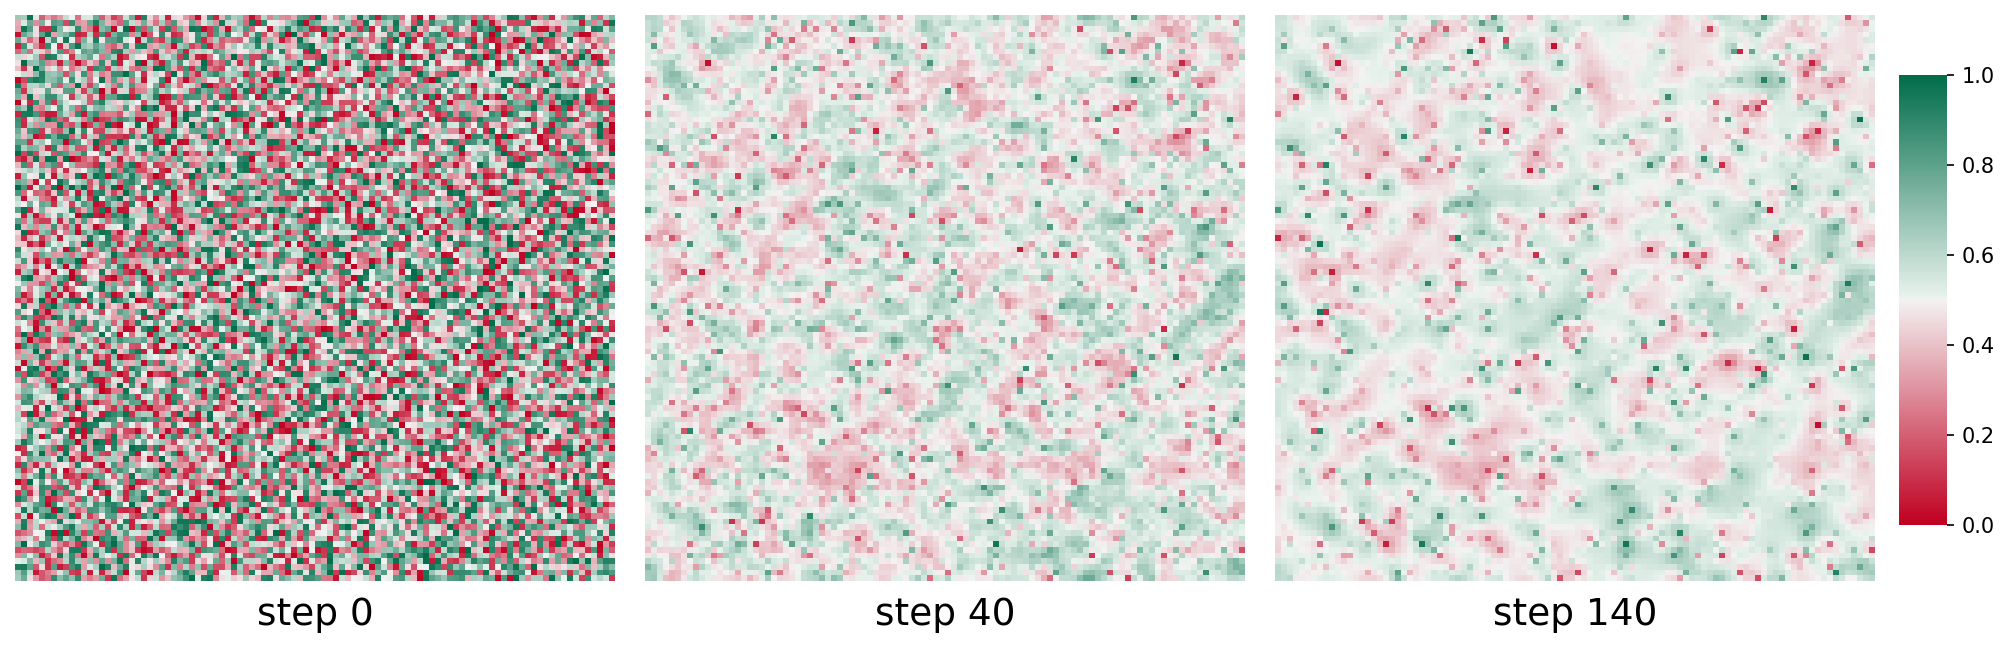

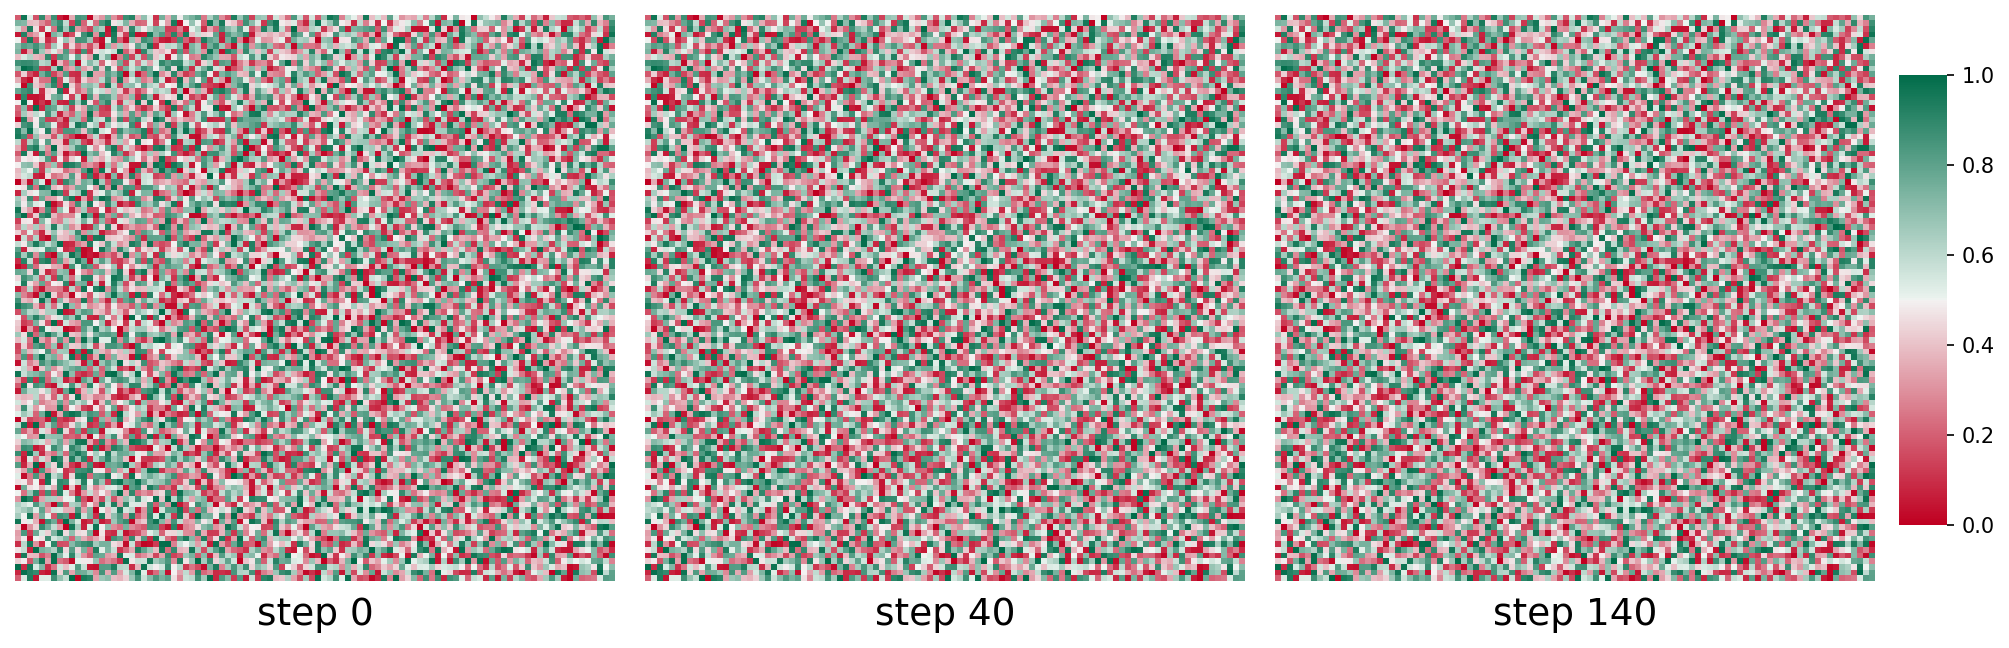

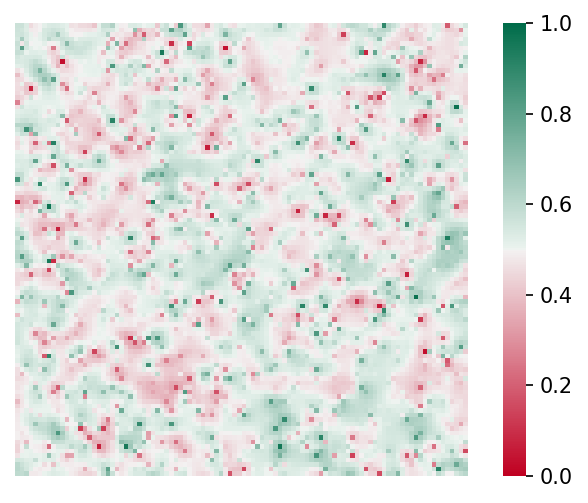

In [400]:

#f1 = "../data/data_po_N-1600_Np-15nn4euclid_No-x_tau-10.0_step-2_ap-0.5_ao-0.5_bounded_init-beta-0.6-4.0.csv"
#f1 = "../data/po100k/data_Np-25_Nf-x_No-25_mix_real_tau-10.0_ap-0.5_ao-0.5_init-beta-0.6-4.0_seed_100.csv"
#f1 = "../data/avantgardeGoal/100k/data_bubble-4-r8_avantgarde-uniform_affinity-uniform_goal-normal-0.6-0.2_100.csv"
f1 = "../data/avantgardeGoal/100k/data_improved_avantgarde-uniform_affinity-uniform_goal-uniform_100.csv"
#f1 = "../data/avantgardeGoal/100k/bubble/data_e-3_r-3_avantgarde-uniform_affinity-uniform_goal-normal-0.6-0.2_100.csv"
#f1 = "../data/avantgardeGoal/100k/radius/data_e-2_avantgarde-uniform_affinity-uniform_goal-uniform100.csv"
dtest = load_data(f1)#, columns=['id','avantgarde', 'affinity', 'step'])

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)

#sns.set(font_scale=)
#dtest = data_dict[6040]
steps = (0, 40, 140)
cbar_ax = fig.add_axes([.91, .2, .02, .6])
#ref = gridAvant(dtest, 100).transpose()*0.5 + 0.5
for i, ax in enumerate(axes.flatten()):
    step = steps[i]
    sns.heatmap(ax=ax, data=grid(dtest, step, 100),  vmin=0., vmax=1.0, cbar=i==0, cbar_ax=cbar_ax, cmap=cmap_green_red)
    cl = "black"#'black' if affinity(data, step).mean() > 0.4 else 'white'
    ax.set_title(f"step {step}", x=0.5, y=-0.1, color=cl, fontsize=18)
    
for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .2, .02, .6])
for i, ax in enumerate(axes.flatten()):
    step = steps[i]
    sns.heatmap(ax=ax, data=gridGoal(dtest, step, 100),  vmin=0., vmax=1.0, cbar=i==0, cbar_ax=cbar_ax, cmap=cmap_green_red)
    cl = "black"#'black' if affinity(data, step).mean() > 0.4 else 'white'
    ax.set_title(f"step {step}", x=0.5, y=-0.1, color=cl, fontsize=18)
    
for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

#fig, ax = plt.subplots(1, 1)
#cbar_ax = fig.add_axes([.91, .2, .02, .6])
plt.figure()

ax = sns.heatmap(data=grid(dtest, 140, 100),  vmin=0., vmax=1.0, cmap=cmap_green_red, square=True)
cl = "black"#'black' if affinity(data, step).mean() > 0.4 else 'white'
#ax.set_title(f"step {0}", x=0.5, y=-0.1, color=cl, fontsize=18)
ax.tick_params(left=False, bottom=False)
ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

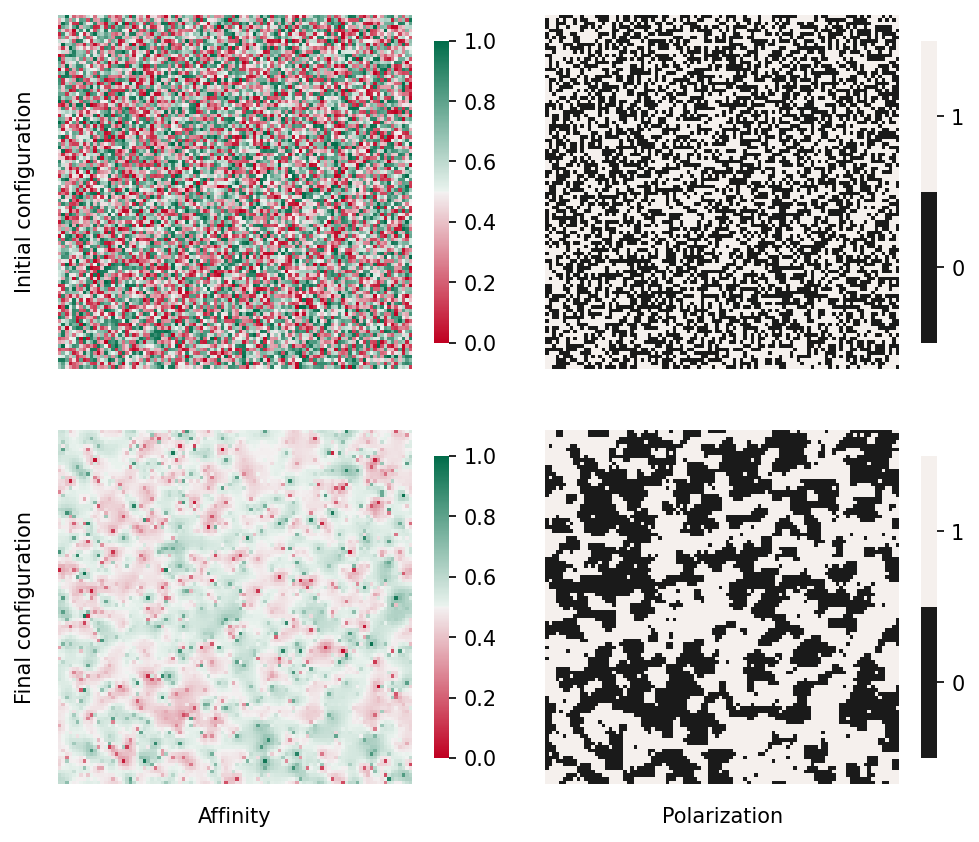

In [487]:
## create affinity polarization grid plot
# 
# Plot 1
# ------
# Grid plot 
# a | b
# c | d
# with a = affinity step 0, b = polarization step 0, c = affinity step final, d = polarization step final
from matplotlib.colors import LinearSegmentedColormap

file = "../data/avantgardeGoal/100k/data_improved_avantgarde-uniform_affinity-uniform_goal-uniform_100.csv"
mdata = load_data(file)

threshold = 0.5
finalStep = 180


colors = ((0.1, 0.1, 0.1), (0.96, 0.94, 0.93))
cmap_black_white = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 7))
sns.heatmap(ax=axes.flatten()[0], data=grid(mdata, 0, 100),  
            vmin=0., vmax=1.0, cmap=cmap_green_red, square=True, cbar_kws={"shrink": .8})
sns.heatmap(ax=axes.flatten()[1], data=grid(mdata, 0, 100) > threshold, 
            vmin=0., vmax=1.0, cmap=cmap_black_white, square=True, cbar_kws={"shrink": .8})
sns.heatmap(ax=axes.flatten()[2], data=grid(mdata, finalStep, 100), 
            vmin=0., vmax=1.0, cmap=cmap_green_red, square=True, cbar_kws={"shrink": .8})
sns.heatmap(ax=axes.flatten()[3], data=grid(mdata, finalStep, 100) > threshold, 
            vmin=0., vmax=1.0, cmap=cmap_black_white, square=True, cbar_kws={"shrink": .8})

for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False, top=False)
    ax.set(xticklabels=[], yticklabels=[])

for ax in (axes.flatten()[1], axes.flatten()[3]):
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([0.25,0.75])
    colorbar.set_ticklabels(['0', '1'])

axes.flatten()[0].set_ylabel("Initial configuration")
axes.flatten()[2].set_ylabel("Final configuration")
axes.flatten()[2].set_xlabel("Affinity")
axes.flatten()[3].set_xlabel("Polarization")

plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.show()

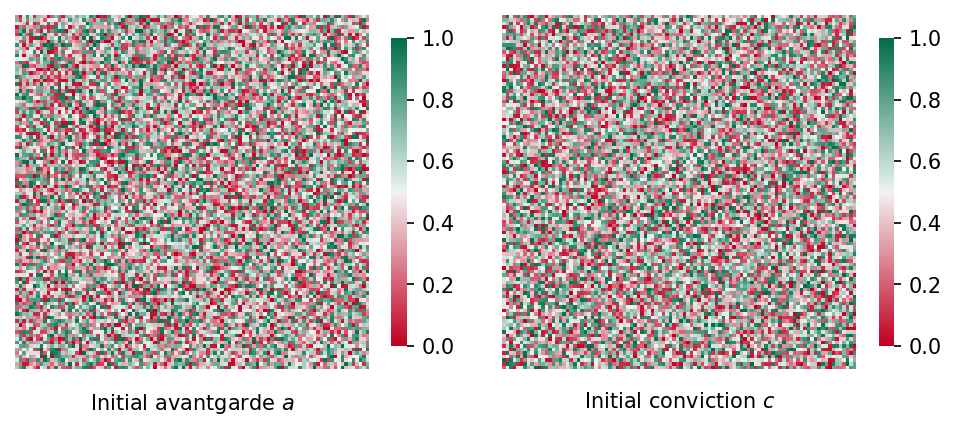

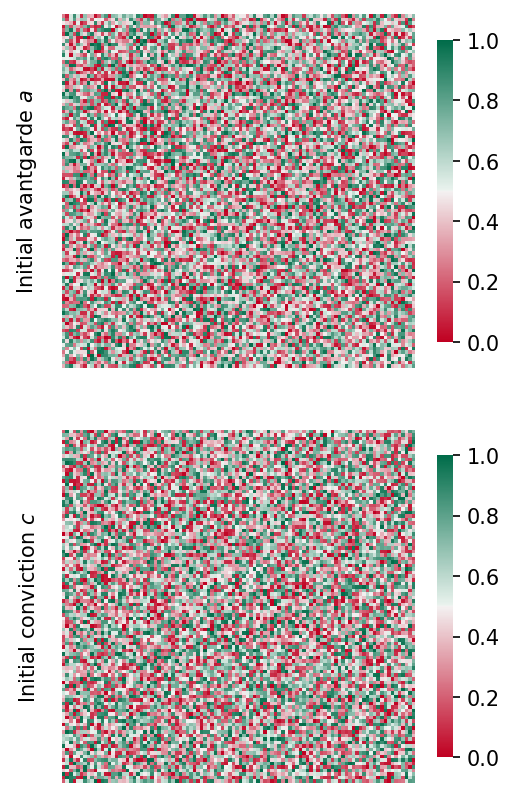

In [503]:
## create initial state grid plot
# 
# Plot 1
# ------
# Grid plot 
# a | b
# with a = affinity goal, b = avantgarde
from matplotlib.colors import LinearSegmentedColormap

file = "../data/avantgardeGoal/100k/data_improved_avantgarde-uniform_affinity-uniform_goal-uniform_100.csv"
mdata = load_data(file)

# horizontal
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 3.4))
sns.heatmap(ax=axes.flatten()[0], data=gridAvant(mdata, 0, 100),  
            vmin=0., vmax=1.0, cmap=cmap_green_red, square=True, cbar_kws={"shrink": .8})
sns.heatmap(ax=axes.flatten()[1], data=gridGoal(mdata, 0, 100), 
            vmin=0., vmax=1.0, cmap=cmap_green_red, square=True, cbar_kws={"shrink": .8})

for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False, top=False)
    ax.set(xticklabels=[], yticklabels=[])

axes.flatten()[0].set_xlabel(r"Initial avantgarde $a$")
axes.flatten()[1].set_xlabel(r"Initial conviction $c$")

plt.subplots_adjust(wspace=0.1, hspace=0.1)

# vertical
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(3.8, 7))
sns.heatmap(ax=axes.flatten()[0], data=gridAvant(mdata, 0, 100),  
            vmin=0., vmax=1.0, cmap=cmap_green_red, square=True, cbar_kws={"shrink": .8})
sns.heatmap(ax=axes.flatten()[1], data=gridGoal(mdata, 0, 100), 
            vmin=0., vmax=1.0, cmap=cmap_green_red, square=True, cbar_kws={"shrink": .8})

for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False, top=False)
    ax.set(xticklabels=[], yticklabels=[])

axes.flatten()[0].set_ylabel(r"Initial avantgarde $a$")
axes.flatten()[1].set_ylabel(r"Initial conviction $c$")

plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.show()

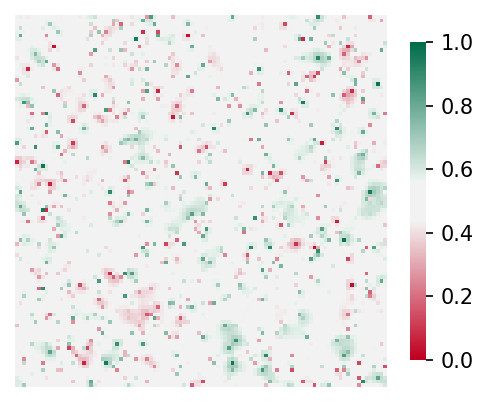

In [507]:
## create color gap plot
# 

file = "../data/avantgardeGoal/100k/data_improved_avantgarde-uniform_affinity-uniform_goal-uniform_100.csv"
mdata = load_data(file)

# horizontal
fig = plt.figure(figsize=(4, 3.5))
sns.heatmap(data=grid(mdata, finalStep, 100),  
            vmin=0., vmax=1.0, cmap=cmap_green_red_gap, square=True, cbar_kws={"shrink": .8})

ax = fig.gca()

ax.tick_params(left=False, bottom=False, top=False)
ax.set(xticklabels=[], yticklabels=[])

axes.flatten()[0].set_xlabel(r"Initial avantgarde $a$")
axes.flatten()[1].set_xlabel(r"Initial conviction $c$")

plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.show()

In [332]:
from scipy.stats import sem

index = 1
saturationStep = 140
size = 50

def AnalyzeBubbleFile(file):
    data = load_data(file)
    
    # calculate average overall affinity
    a = avantgarde(data, saturationStep)
    overallAffinity = (a.mean(), sem(a))
    
    bubbleIndices = [CoordsToIndex(n, size) for n in ChebyshevNeighbours(0, 1, 2, size)]
    bubbleAgents = data.query("id in @bubbleIndices")
    
    # calculate average bubble affinity
    a = avantgarde(bubbleAgents, saturationStep)
    bubbleAffinity = (a.mean(), sem(a))
    
    # calculate overall satisfaction
    s = Satisfaction(data, saturationStep)
    overallSatisfaction = (s.mean(), sem(s))
    
    # calculate satisfaction bubble
    s = Satisfaction(bubbleAgents, saturationStep)
    bubbleSatisfaction = (s.mean(), sem(s))
    
    
    return overallAffinity, bubbleAffinity, overallSatisfaction, bubbleSatisfaction

def AnalyzeBubble(radius):
    path = "../data/avantgardeGoal/100k/bubble/"
    
    oA, bA, oS, bS = [], [], [], []
    for seed in range(100, 110):
        file = "data_r-%1d_avantgarde-uniform_affinity-uniform_goal-normal-0.6-0.2_%3d.csv" % (radius, seed)
        _oA, _bA, _oS, _bS = AnalyzeBubbleFile(path + file)
        oA.append(unumpy.uarray(*_oA))
        oS.append(unumpy.uarray(*_oS))
        bA.append(unumpy.uarray(*_bA))
        bS.append(unumpy.uarray(*_bS))
        
    return np.sum(oA) / len(oA), np.sum(bA) / len(bA), np.sum(oS) / len(oS), np.sum(bS) / len(bS)
    
class ChebyshevNeighbours:
    def __init__(self, i, j, r, N):
        self.N = N
        self.x = (i - r - 1) % N
        self.y = (j - r) % N
        self.i = i
        self.j = j
        self.r = r
        self.xcount = 0
        self.ycount = 1

    def __iter__(self):
        return self

    def __next__(self): # Python 2: def next(self)
        self.xcount += 1
        self.x += 1
        self.x = self.x % self.N
        
        if self.xcount > self.r * 2 + 1:
            self.xcount = 1
            self.ycount += 1
            self.x = (self.i - self.r) % self.N
            self.y += 1
            self.y = self.y % self.N
        
        if self.ycount > self.r * 2 + 1:
            raise StopIteration
        
        return (self.x, self.y)
    
r = [2, 3, 4, 5, 8, 10, 15]
A, errA = [], []
S, errS = [], []
bA, errbA = [], []
bS, errbS = [], []

for ri in r:
    a, ba, s, bs = AnalyzeBubble(ri)
    A.append(a.n)
    errA.append(a.s)
    S.append(s.n)
    errS.append(s.s)
    bA.append(ba.n)
    errbA.append(ba.s)
    bS.append(bs.n)
    errbS.append(bs.s)

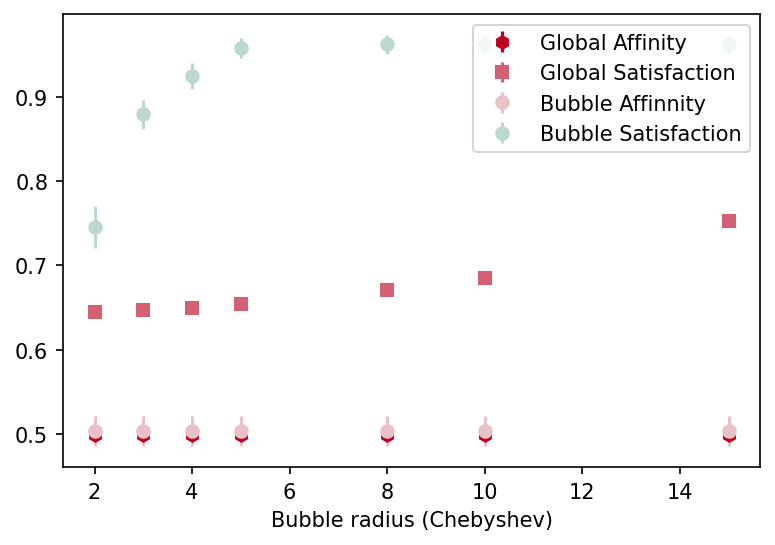

In [333]:
# Plot average bubble affinity, satisfaction over bubble radius
plt.figure()
plt.errorbar(r, A, yerr=errA, fmt='h', label='Global Affinity')
plt.errorbar(r, S, yerr=errS, fmt='s', label='Global Satisfaction')
plt.errorbar(r, bA, yerr=errbA, fmt='o', label='Bubble Affinnity')
plt.errorbar(r, bS, yerr=errbS, fmt='o', label='Bubble Satisfaction')
plt.xlabel('Bubble radius (Chebyshev)')
plt.legend()
plt.show()

Total satisfaction: 0.7531


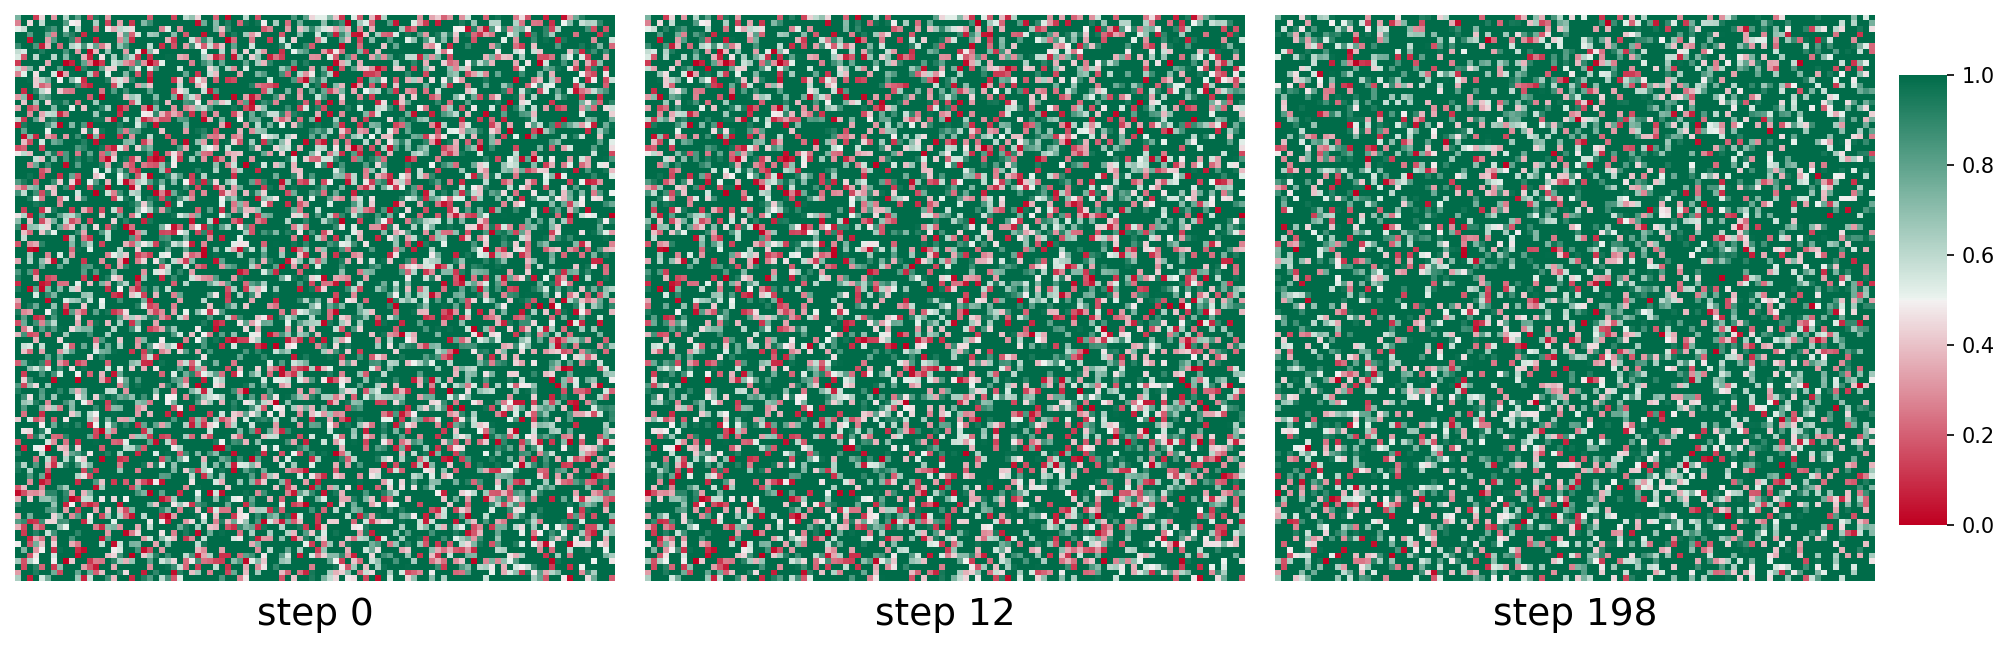

In [331]:
# Estimation of agent satisfaction
# --------------------------------

def Satisfaction(data, step):
    threshold = .5
    gap = 0.0
    
    size = data.query('step == 0').get('id').values.size

    affinityGoalGreaterThanThreshold = affinityGoal(data, step) > threshold
    #Ahat = np.sign(avantgarde(data, step)) * 0.5 + 0.5
    affinityGreaterThanThreshold = affinity(data, step) > threshold

    return affinityGreaterThanThreshold == affinityGoalGreaterThanThreshold

def AdjustedSatisfaction(data, step):
    """Consider weighting by avantgarde factor."""
    s = Satisfaction(data, step)
    N = data.query('step == 0').get('id').values.size
    a = avantgarde(data, step)
    return s * a +  (1-a)
    

def TotalSatisfaction(data, step):
    N = data.query('step == 0').get('id').values.size
    return Satisfaction(data, step).sum() / N

def TotalAdjustedSatisfaction(data, step):
    N = data.query('step == 0').get('id').values.size
    return AdjustedSatisfaction(data, step).sum() / N

print("Total satisfaction: %.4f" % TotalAdjustedSatisfaction(dtest, 4))

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)

steps = (0, 12, 198)

cbar_ax = fig.add_axes([.91, .2, .02, .6])
for i, ax in enumerate(axes.flatten()):
    step = steps[i]
    sns.heatmap(ax=ax, data=AdjustedSatisfaction(dtest, step).reshape(100, 100),  
                vmin=0., vmax=1.0, cbar=i==0, cbar_ax=cbar_ax, cmap=cmap_green_red)
    ax.set_title(f"step {step}", x=0.5, y=-0.1, color='black', fontsize=18)
    
for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)


Threshold = 0.5: CD = 0.42


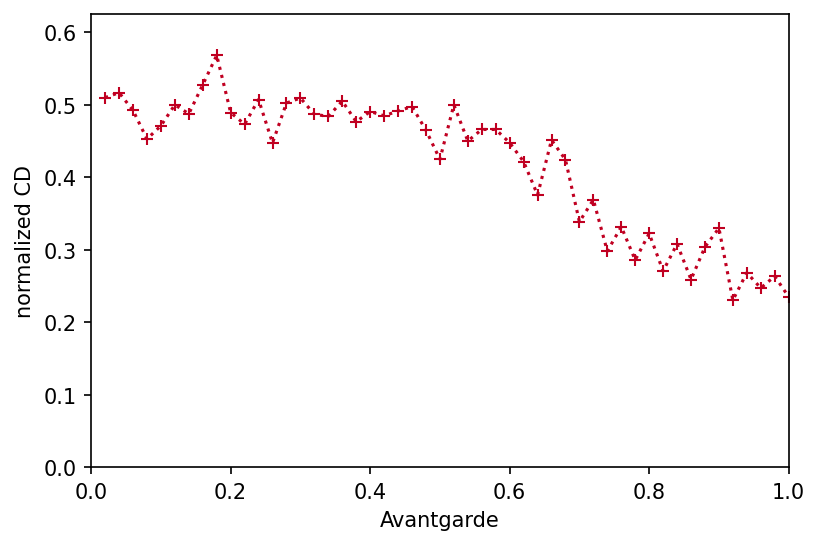

Threshold = 0.5: CD = 0.32


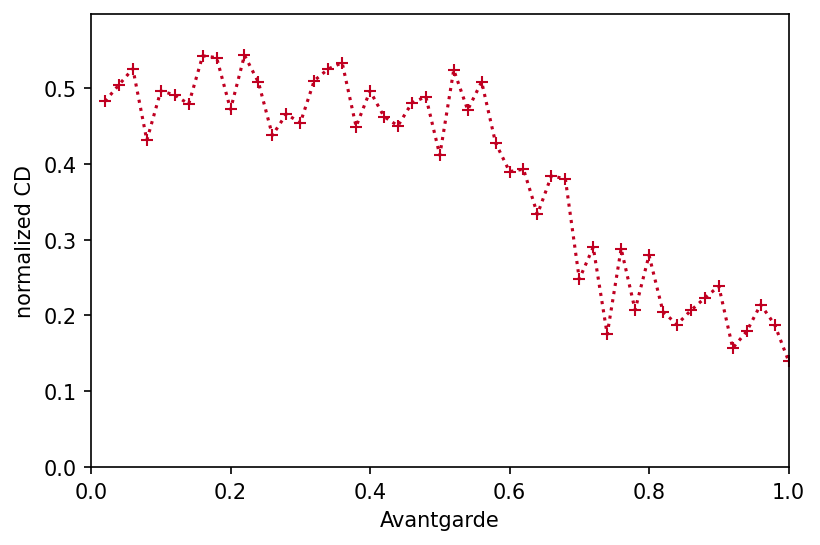

In [244]:
# Improved Metric
# CD (Cognitive Dissonance)
# counts the number of dissonances between Ahat and A_final

finalStep = 140

# considering threshold decision
threshold = .5

def CD(data, finalStep, threshold):
    affinityGoalGreaterThanThreshold = affinityGoal(data, 0) >= threshold
    finalAffinityGreaterThanThreshold = affinity(data, finalStep) >= threshold
    CD = affinityGoalGreaterThanThreshold != finalAffinityGreaterThanThreshold
    return CD

def PlotCD(data, finalStep, n):
    bins = np.linspace(0, 1., n+1)
    avantgardeGrouped = bins[:-1] + 1. / n
    groupCount = np.zeros(n)
    CD_Grouped = np.zeros(n)

    for a, cd in zip(avantgarde(data, 0), CD(data, finalStep, 0.5)):
        i = np.searchsorted(bins, a) - 1
        groupCount[i] += 1
        CD_Grouped[i] += cd

    relativeCD = CD_Grouped / groupCount

    plt.figure()
    plt.plot(avantgardeGrouped, relativeCD, '+:')
    plt.xlim([0, 1])
    plt.ylim([0, relativeCD.max() * 1.1])
    plt.xlabel('Avantgarde')
    plt.ylabel('normalized CD')
    plt.show()
    

print("Threshold = 0.5: CD = %.2f" % (CD(dtest, finalStep, 0.5).sum() / 1e4))
PlotCD(dtest, finalStep, 50)

# filter decisive agents
print("Threshold = 0.5: CD = %.2f" % (CD(dtest.query("affinityGoal >= 0.6 | affinityGoal <= 0.4"), finalStep, 0.5).sum() / 1e4))
PlotCD(dtest.query("affinityGoal >= 0.7 | affinityGoal <= 0.3"), finalStep, 50)

In [34]:
IdToIndex = lambda _id: _id - 1
IndexToId = lambda _index: _index + 1

def IndexToCoords(index, Nx):
    coords = np.zeros(2, dtype='int32')
    coords[1] = int(index % Nx)
    coords[0] = int(index / Nx)
    return coords

def CoordsToIndex(coords, Nx):
    return int(coords[0] * Nx + coords[1])

def neighbours(data, _id):
    N = data["id"].max()
    Nx = int(np.sqrt(N))
    idx = IdToIndex(_id)
    
    rowNeighbours = [-1, -1, -1, 0, 0, 1, 1, 1]
    columnNeighbours = [-1, 0, 1, -1, 1, -1, 0, 1]
    
    coords = IndexToCoords(idx, Nx)
    nn_idx = []
    for r, c in zip(rowNeighbours, columnNeighbours):
        index = CoordsToIndex((coords + np.array([r, c])) % Nx, Nx)
        nn_idx.append(index)
            
    nn_ids = [IndexToId(k) for k in nn_idx]
    
    return data[data["id"].isin(nn_ids)]

# tests
testArray = np.array([9, 9])
result = np.all(IndexToCoords(CoordsToIndex(testArray, 10), 10) == testArray)
msg = 'was successful' if result else 'failed'
print("Function invertion test " + msg)

Function invertion test was successful


Adjustment to goal affinity (|A_goal - A|)


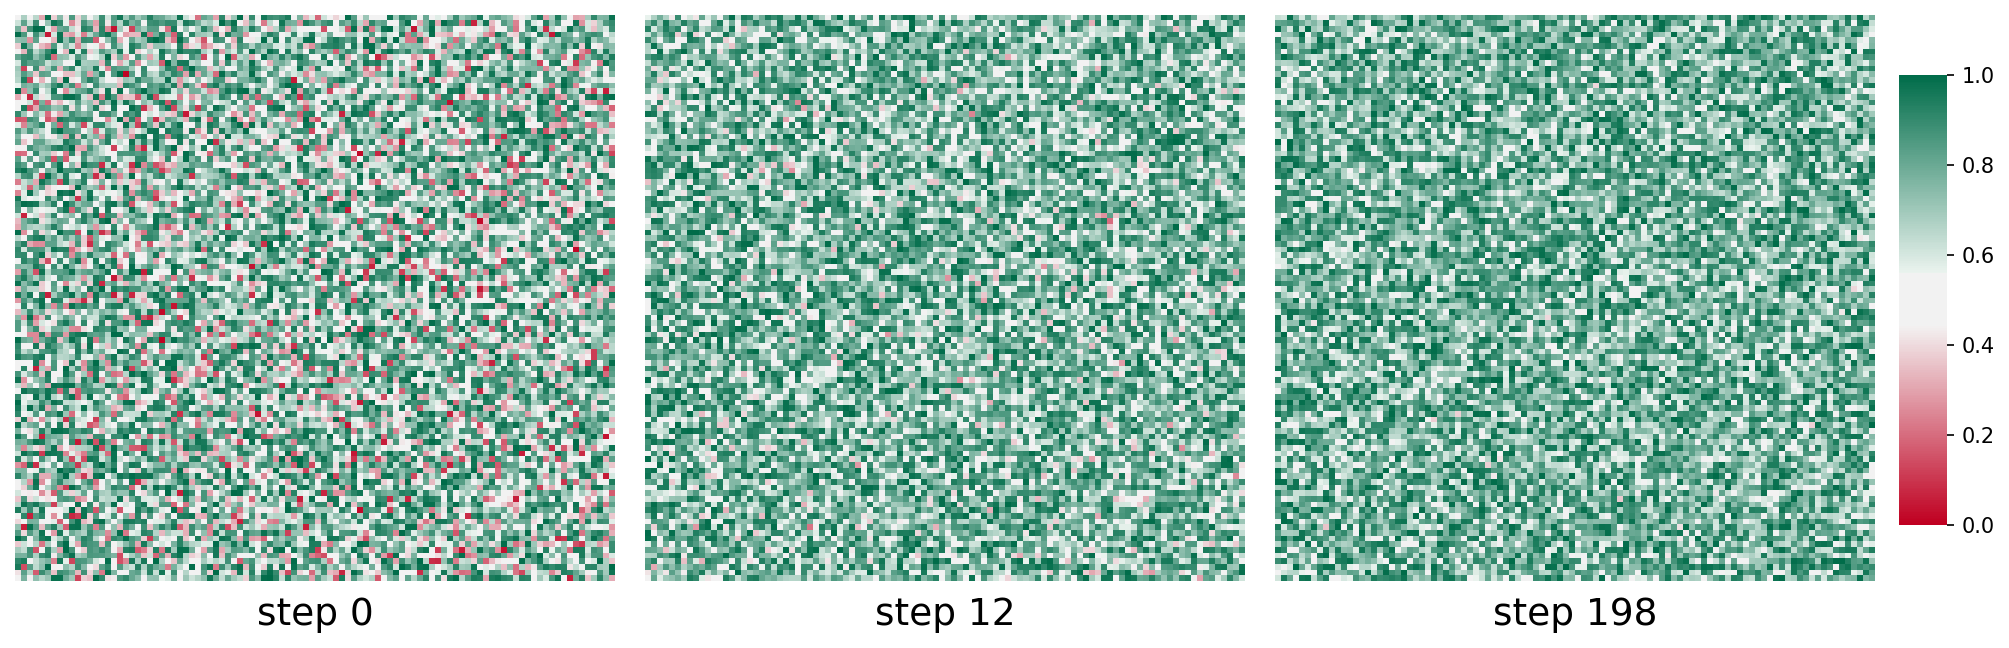

In [237]:
def dAfun(data, step, agentId):
    alpha = 1
    a = avantgarde(data.query("id == @agentId"), step).item(0)
    Acurrent = affinity(data.query("id == @agentId"), step).item(0)
    
    #delta = np.sign(a)
    #a = np.abs(a)

    Ahat = affinityGoal(data.query("id == @agentId"), step).item(0)
    delta = Ahat - Acurrent
    
    W = np.mean(affinity(neighbours(data, agentId), step)) - Acurrent
    dW = (1-a)*W
    dA = dW + a * alpha * delta * abs(W)
    return dA, W, delta, a

# for agentId in np.arange(1, 10000, 1):
#     _dA, W, _delta, a = dAfun(dtest, 160, agentId)
#     if (abs(_delta) < 0.05):
#         print(_delta, W, a)

print("Adjustment to goal affinity (|A_goal - A|)")

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)

steps = (0, 12, 198)

cbar_ax = fig.add_axes([.91, .2, .02, .6])
for i, ax in enumerate(axes.flatten()):
    step = steps[i]
    sns.heatmap(ax=ax, data=1.-np.abs(affinityGoal(dtest, step).reshape(100, 100) - affinity(dtest, step).reshape(100, 100)),  
                vmin=0., vmax=1.0, cbar=i==0, cbar_ax=cbar_ax, cmap=cmap_green_red)
    ax.set_title(f"step {step}", x=0.5, y=-0.1, color='black', fontsize=18)
    
for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)


In [238]:
# Distribution of rebels (agents with rebelling opinion in homogeneous bubble)

def filterRebels(data, step):
    threshold = 0.5
    ids = []
    
    for i in range(1, 10000, 1):
        nn = neighbours(data, i)
        a = affinity(data.query('id == @i'), step)
        ann = affinity(nn, step)
        
        b = a[0] > threshold
        bnn = np.mean(ann) > threshold
        s = np.sum(ann > threshold)
        bstd = s >= 8 or s <= 0
        
        if (bnn != b) and bstd:
            ids.append(i)
            
    return ids
        
ids = filterRebels(dtest, 140)

In [239]:
aArr, deltaArr = [], []
for rebel in ids:
    _, _, delta, a = dAfun(dtest, 140, rebel)
    aArr.append(a)
    deltaArr.append(delta)

aMean, aMedian, aMin, aMax = np.mean(aArr), np.median(aArr), np.min(aArr), np.max(aArr)
print(f"Avantgarde: Min: {aMin:.2f}\t Max: {aMax:.2f}\t Mean: {aMean:.2f}\t Median: {aMedian:.2f}\t")

Avantgarde: Min: 0.62	 Max: 1.00	 Mean: 0.83	 Median: 0.84	


In [313]:
np.min(np.abs(deltaArr))
dtestTransformed

,step,id,affinity,avantgarde,affinityGoal,affinityGoal groups,dA
10000,2,1,0.650530,0.260125,0.190313,"$a \in \left[0.2, 0.3\right]$",0.0
10001,2,2,0.645799,0.067193,0.967600,"$a \in \left[0.8, 1.0\right]$",0.0
10002,2,3,0.915134,0.545968,0.526845,"$a \in \left[0.5, 0.7\right]$",0.0
10003,2,4,0.521038,0.868194,0.172707,"$a \in \left[0.2, 0.3\right]$",0.0
10004,2,5,0.229064,0.557837,0.893169,"$a \in \left[0.8, 1.0\right]$",0.0
...,...,...,...,...,...,...,...
999995,198,9996,0.486265,0.546545,0.231977,"$a \in \left[0.2, 0.3\right]$",0.0
999996,198,9997,0.487120,0.229368,0.247023,"$a \in \left[0.2, 0.3\right]$",0.0
999997,198,9998,0.540750,0.685058,0.530775,"$a \in \left[0.5, 0.7\right]$",0.0
999998,198,9999,0.571064,0.590378,0.821052,"$a \in \left[0.7, 0.8\right]$",0.0


C:\Users\hoedtke\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\hoedtke\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


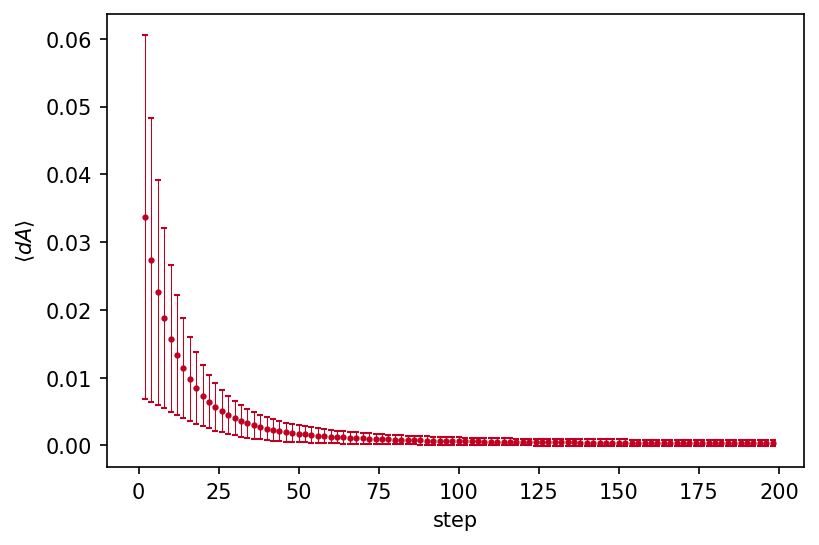

In [316]:
dtestTransformed = dtest.query("step > 0")
dtest['dA'] = dtest['affinity'].diff(periods=10000).abs()
grouped = dtest.query('step < 200').groupby('step')

plt.figure()
plt.errorbar(grouped.groups.keys(), grouped.mean().get('dA'), yerr=grouped.std().get('dA'),
            capsize=1.5, elinewidth=0.5, ms=2, marker='o', linestyle='None')
plt.xlabel('step')
plt.ylabel(r'$\langle dA \rangle$')
plt.show()

In [900]:
# which equilibrium?
alpha = 1
agentId = 4020

data = dtest
step = 200

a = avantgarde(data.query("id == @agentId"), step).item(0)
delta = np.sign(a)
a = np.abs(a)

#Ahat = affinityGoal(data.query("id == @agentId"), step).item(0)
Acurrent = affinity(data.query("id == @agentId"), step).item(0)

#delta = Ahat - Acurrent

W = np.mean(affinity(neighbours(data, agentId), step)) - Acurrent

print(1 - abs(W))

(1-a)*W + a * alpha * delta * (1- abs(W))

0.8442894863887928


0.003529339672987325

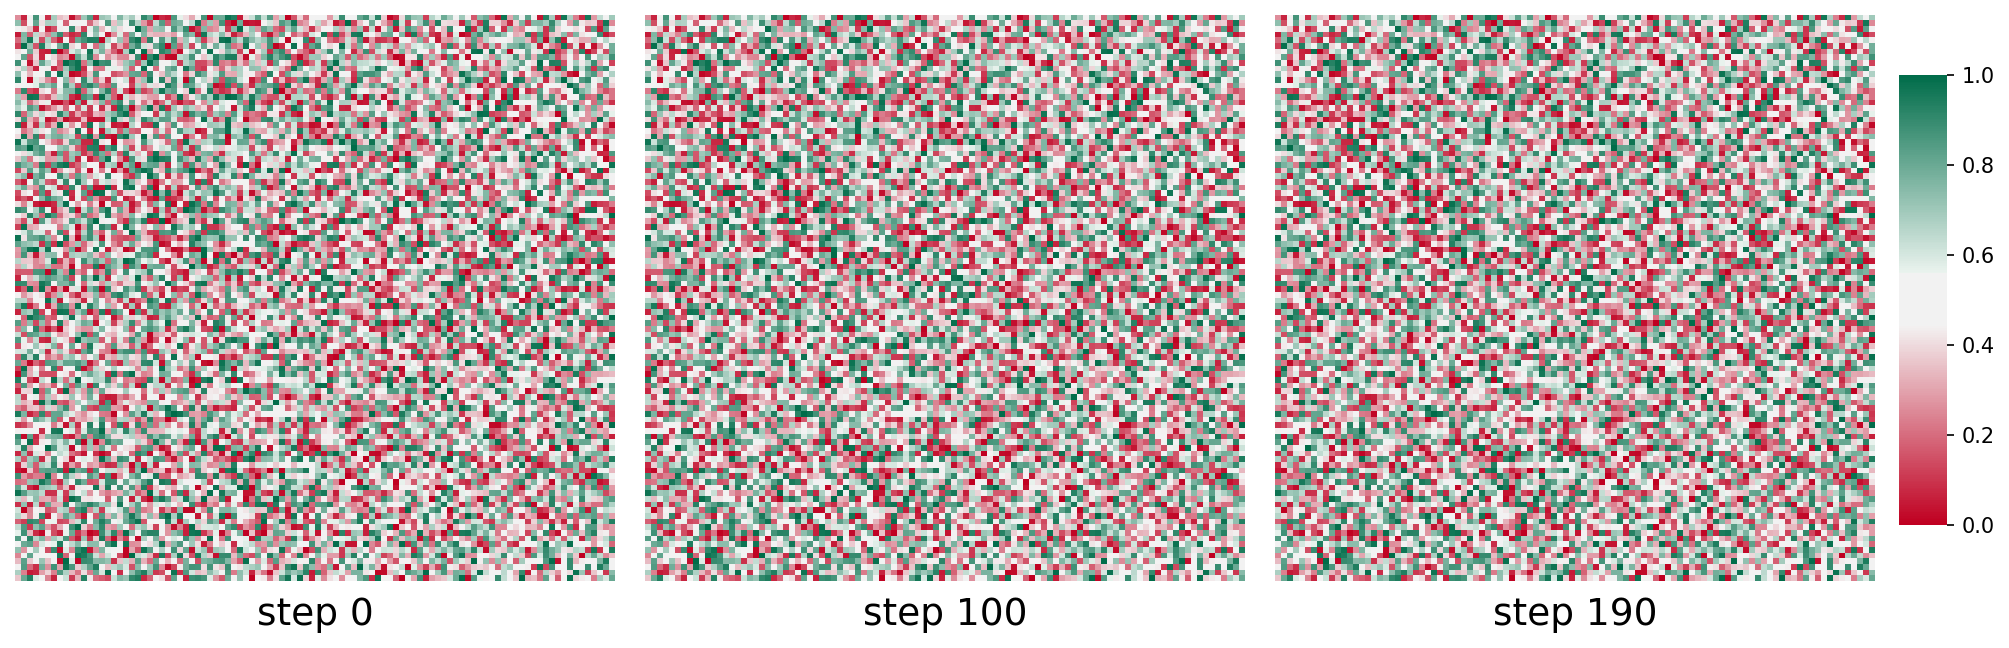

In [236]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)
#dtest = data_dict[6040]
steps = (0, 100, 190)
cbar_ax = fig.add_axes([.91, .2, .02, .6])
#ref = gridAvant(dtest, 100).transpose()*0.5 + 0.5
for i, ax in enumerate(axes.flatten()):
    step = steps[i]
    sns.heatmap(ax=ax, data=gridAvant(dtest, step, 100),  vmin=0., vmax=1., cbar=i==0, cbar_ax=cbar_ax, cmap=cmap_green_red)
    cl = "black"#'black' if affinity(data, step).mean() > 0.4 else 'white'
    ax.set_title(f"step {step}", x=0.5, y=-0.1, color=cl, fontsize=18)
    
for ax in axes.flatten():
    ax.tick_params(left=False, bottom=False)
    ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [513]:
#affinityarr = dtest.groupby("step").std().get("affinity")

bins = np.linspace(0, 1., 7)
dtest["Conviction Groups"] = np.digitize(dtest["affinityGoal"], bins=bins, right=True)
dtest["Conviction Groups"] = dtest["Conviction Groups"].apply(lambda x: fr"$a \in \left[{bins[x-1]:.1f}, {bins[x]:.1f}\right]$")

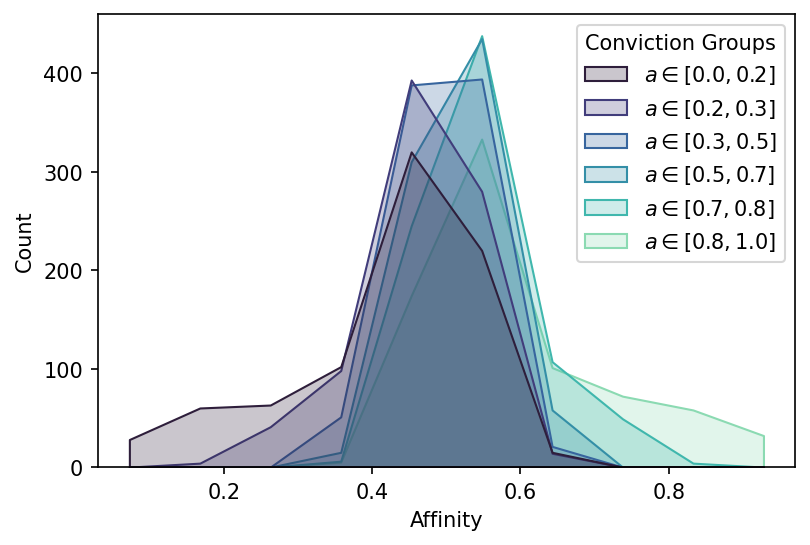

In [519]:
group_label = lambda x: fr"$a \in \left[{bins[x-1]:.1f}, {bins[x]:.1f}\right]$"
order = [group_label(x) for x in range(1, 7, 1)]
plt.figure(figsize=(6, 4))
ax = sns.histplot(data=dtest.query("step == 198").query("avantgarde > 0.5"), x="affinity", hue="Conviction Groups", 
             bins=10, element="poly", hue_order=order, palette="mako")
ax.set_xlabel(r'Affinity')
plt.show()

In [262]:
k = 150

def DFS(i, j, data, visited, value=0):
    
    size = 0
    
    rowNeighbours = [-1, -1, -1, 0, 0, 1, 1, 1]
    columnNeighbours = [-1, 0, 1, -1, 1, -1, 0, 1]
    
    if visited[i, j] or data[i, j] != value:
        return size
    
    visited[i, j] = 1
    size += 1
    
    for r in rowNeighbours:
        for c in columnNeighbours:
            iNew = (i+r) % data.shape[0]
            jNew = (j+c) % data.shape[1]
            size += DFS(iNew, jNew, data, visited=visited, value=value)
    
    return size

def CountSizes(data):
    counts = {key: [] for key in np.unique(data.flatten())}
    visited = np.zeros(data.shape)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            size = DFS(i, j, data, visited, value=data[i, j])
            if size > 0:
                counts[data[i, j]].append(size)
    return counts

grid = lambda data, step: affinity(data, step).reshape(100, 100)
islands = np.digitize(grid(dtest, 180), bins=np.arange(0, 1, 0.5))
#islands = np.array([[1, 1, 0, 0],
#                   [1, 5, 0, 1],
#                   [0, 5, 1, 0],
#                   [0, 0, 5, 5]])
#size = DFS(0, 0, islands, visited, value=1)
#visited

counts = CountSizes(islands)
print({key: (len(count), np.mean(count).round(2)) for key, count in counts.items()})

{1: (59, 79.05), 2: (44, 121.27)}


In [264]:
counts

{1: [370,
  3438,
  69,
  64,
  337,
  7,
  1,
  1,
  1,
  8,
  38,
  3,
  32,
  1,
  1,
  1,
  1,
  16,
  1,
  1,
  1,
  1,
  18,
  1,
  1,
  1,
  8,
  6,
  1,
  1,
  1,
  1,
  20,
  10,
  3,
  2,
  76,
  4,
  1,
  1,
  74,
  2,
  1,
  1,
  1,
  1,
  1,
  2,
  21,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2],
 2: [5132,
  64,
  1,
  1,
  6,
  1,
  10,
  1,
  1,
  1,
  1,
  1,
  1,
  9,
  1,
  1,
  1,
  1,
  1,
  1,
  8,
  21,
  12,
  1,
  1,
  1,
  2,
  10,
  1,
  1,
  3,
  1,
  1,
  1,
  14,
  1,
  1,
  1,
  14,
  1,
  1,
  1,
  1,
  1]}

In [671]:
import glob

counts = None

for file in glob.glob('../data/po100k/data_avantgarde-normal-0.0-0.3_affinity-constant-0.2*.csv'):
    dtest = load_data(file)
    islands = np.digitize(grid(dtest, 300), bins=np.arange(0, 1, 0.1))
    countsCurrent = CountSizes(islands)
    
    if counts:
        for key, val in countsCurrent.items():
            counts[key].extend(val)
    else:
        counts=countsCurrent

In [686]:
arr = np.array([[(0.1*key - 0.1).round(1), val] for key, count in counts.items() for val in count])
countsDataFrame = pd.DataFrame(data=arr, columns=["Affinity", "Island Size"])
countsDataFrame["$A_0$"] = "uniform"

In [672]:
arr = np.array([[(0.1*key - 0.1).round(1), val] for key, count in counts.items() for val in count])
countsDataFrameTmp = pd.DataFrame(data=arr, columns=["Affinity", "Island Size"])
countsDataFrameTmp["$A_0$"] = "constant (0.2)"

countsDataFrame = countsDataFrame.append(countsDataFrameTmp, ignore_index=True)

In [609]:
arr = np.array([[(0.1*key - 0.1).round(1), val] for key, count in counts.items() for val in count])
countsDataFrameTmp = pd.DataFrame(data=arr, columns=["Affinity", "Island Size"])
countsDataFrameTmp["$A_0$"] = "uniform"

countsDataFrame = countsDataFrame.append(countsDataFrameTmp, ignore_index=True)

<AxesSubplot:xlabel='Affinity', ylabel='Island Size'>

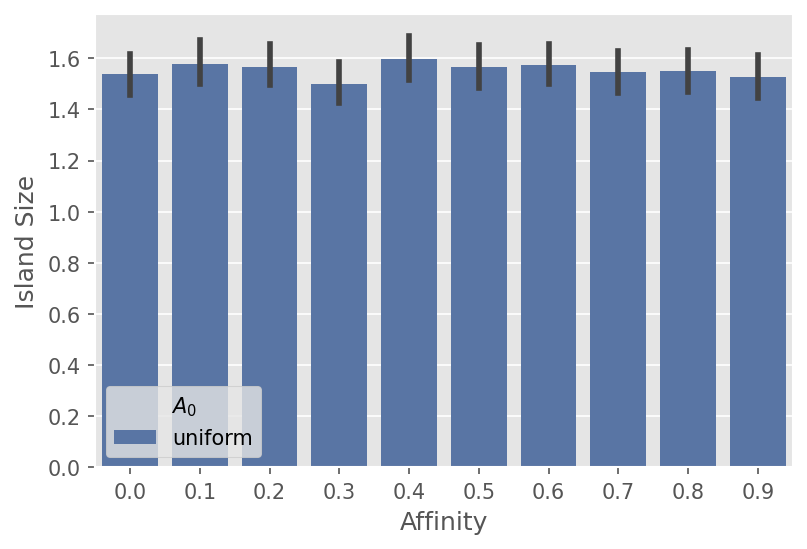

In [687]:
sns.barplot(data=countsDataFrame, x="Affinity", y="Island Size", hue="$A_0$")

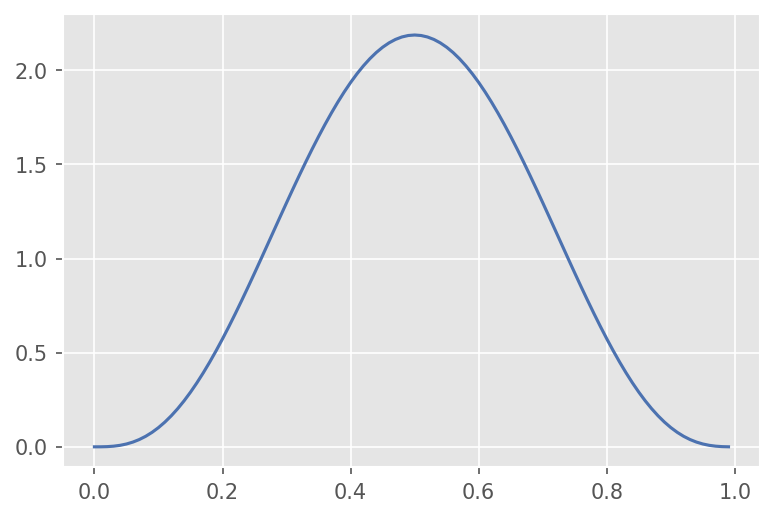

In [176]:
import scipy as sp

a, b = 4., 4.0
pdfBeta = lambda x: (x**(a-1)*(1-x)**(b-1)) / sp.special.beta(a, b)

x = np.arange(0, 1, 0.01)

plt.figure()
plt.plot(x, pdfBeta(x))
plt.show()

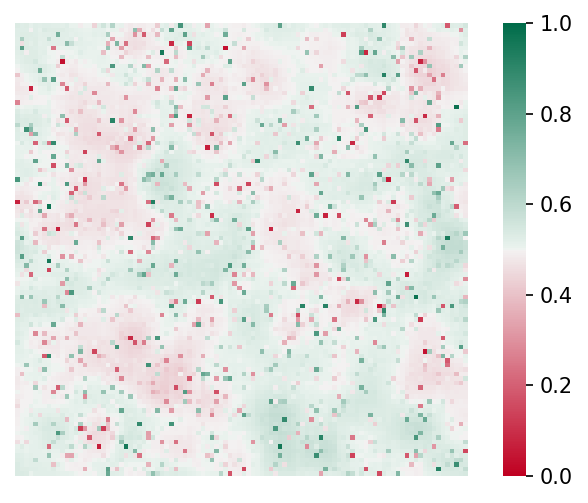

In [345]:
plt.figure()

ax = sns.heatmap(data=grid(dtest, 140, 100),  vmin=0., vmax=1.0, cmap=cmap_green_red, square=True)
cl = "black"#'black' if affinity(data, step).mean() > 0.4 else 'white'
#ax.set_title(f"step {0}", x=0.5, y=-0.1, color=cl, fontsize=18)
ax.tick_params(left=False, bottom=False)
ax.set(xticklabels=[], yticklabels=[])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

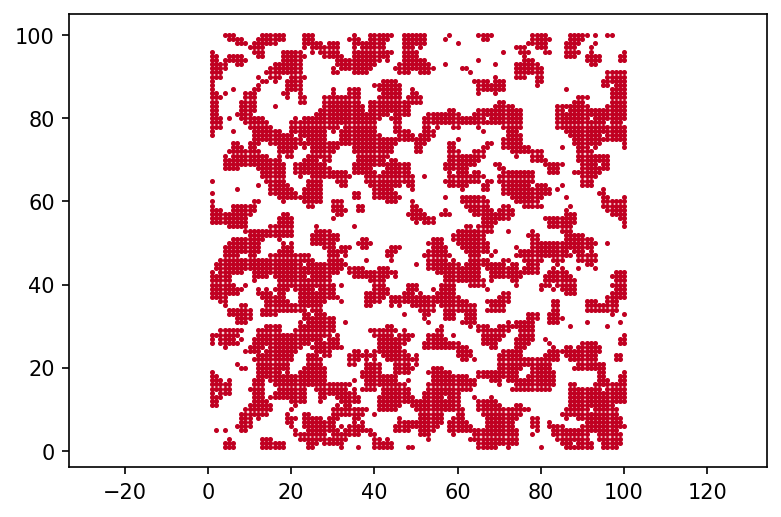

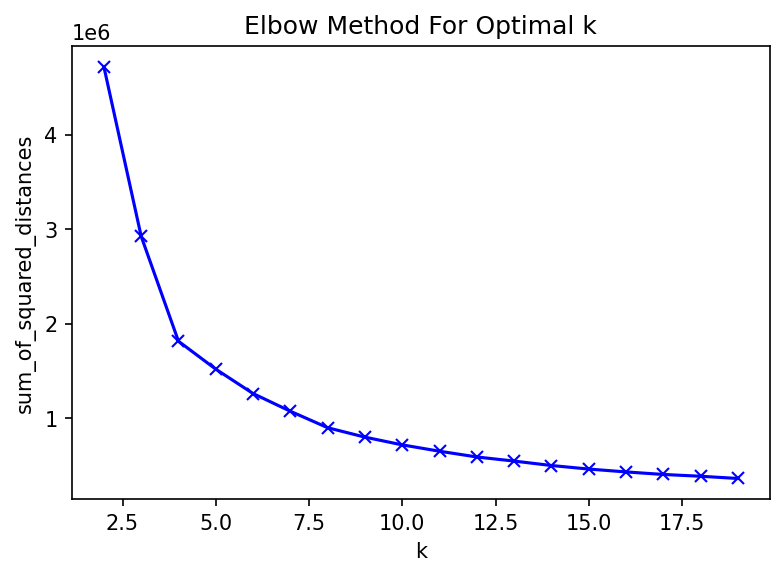

In [401]:
# KMeans clustering
from sklearn.cluster import KMeans

# convert state into x, y coordinates
step = 140
state = dtest.query("step == @step").get(["affinity", "avantgarde", "affinityGoal"])\
    .copy().reset_index(drop=True)

x = np.linspace(1, 100, 100)
xv, yv = np.meshgrid(x, x)
state["x"] = xv.flatten()
state["y"] = yv.flatten()

positive = state.query("affinity < 0.5")
plt.scatter(positive["x"], positive["y"], s=2)
plt.axis("equal")

data = positive.get(["x", "y"])

sum_of_squared_distances = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    sum_of_squared_distances.append(km.inertia_)

plt.figure()
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


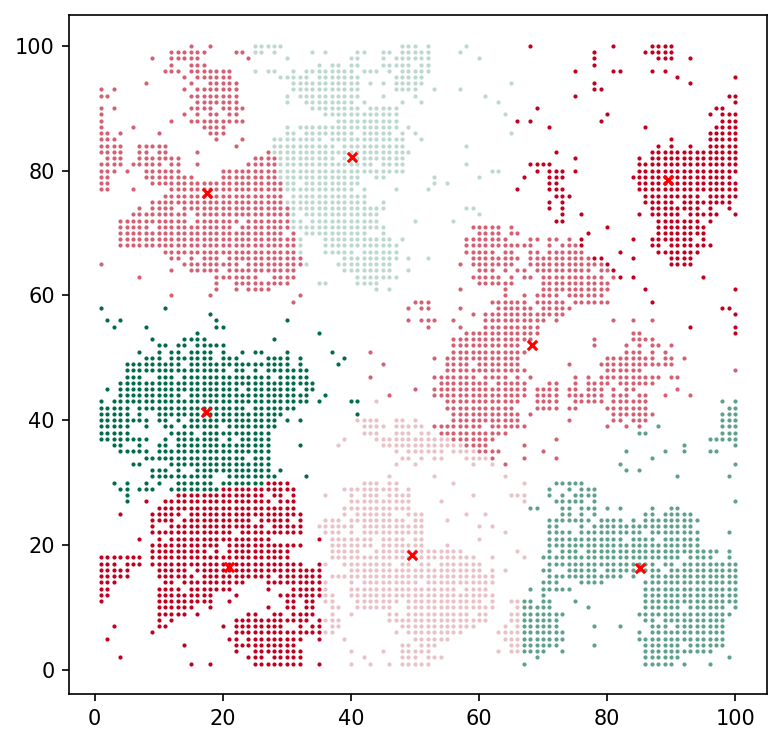

In [399]:

n_clusters = 8
kmeans = KMeans(random_state=10, n_clusters=n_clusters, algorithm='full')
kmeans.fit(data)

plt.figure(figsize=(6, 6))

for i in range(n_clusters):
    bunch = positive[kmeans.labels_ == i]
    plt.scatter(bunch["x"], bunch["y"], s=1)

# scatter centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=20, c='red')

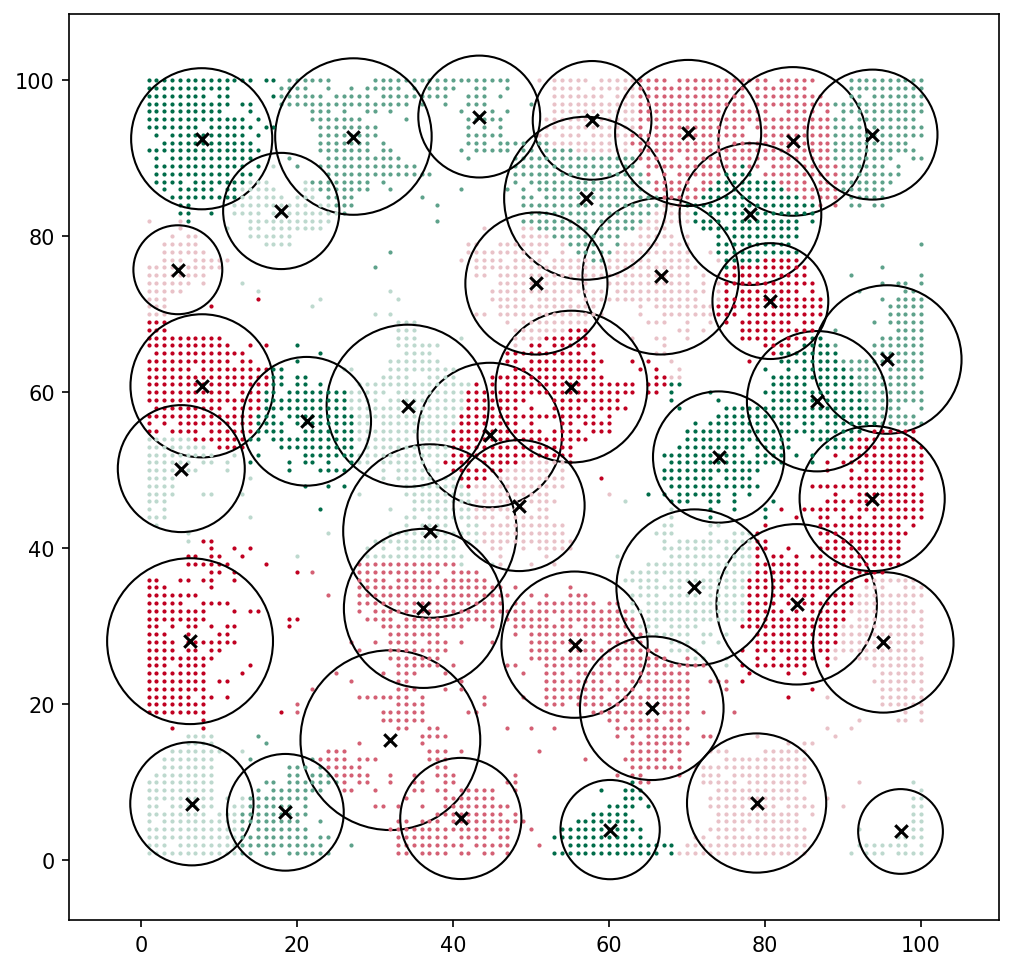

In [397]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=0,
                    covariance_type='spherical').fit(data)
labels = gm.predict(data)

fig = plt.figure(figsize=(8, 8))

for i in range(40):
    bunch = data[labels == i]
    plt.scatter(bunch["x"], bunch["y"], s=1)
    plt.scatter(gm.means_[i][0], gm.means_[i][1], marker='x', color='black')
    sigma = np.sqrt(gm.covariances_[i])
    circle = plt.Circle(gm.means_[i], 2*sigma, color='black', fill=False)
    fig.gca().add_patch(circle)

plt.axis('equal')
plt.show()